### Visualizador de soluciones GRASP

In [2]:
!pip3 install matplotlib

Defaulting to user installation because normal site-packages is not writeable


['Evaluación:', '1.79769e+308']


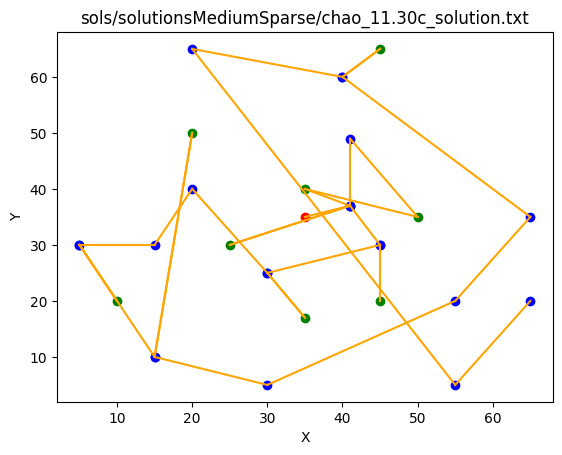

In [7]:
import matplotlib.pyplot as plt

def plot_tsp_solution(solutions,eval,filename):
    # Plot nodes and edges for each vehicle
    print(eval)
    colors = ["orange","red","green","violet","purple"]
    for index,solution in enumerate(solutions):
        x = [node[0] for node in solution]
        y = [node[1] for node in solution]
        is_customers = [node[2] for node in solution]
        depot = (x[0],y[0])
        x = x[1:]
        y = y[1:]
        is_customers = is_customers[1:]

        normal_clients_x = [x[i] for i in range(len(x)) if is_customers[i] == 0]
        normal_clients_y = [y[i] for i in range(len(y)) if is_customers[i] == 0]
        truck_clients_x = [x[i] for i in range(len(x)) if is_customers[i] == 1]
        truck_clients_y = [y[i] for i in range(len(y)) if is_customers[i] == 1]
        
        plt.scatter(depot[0], depot[1], color="red") #Aqui depot
        plt.scatter(normal_clients_x, normal_clients_y, color="blue") #Aqui clientes normales
        plt.scatter(truck_clients_x, truck_clients_y, color="green") #Aqui clientes de camion

        for i in range(len(solution) - 1):
            plt.plot([solution[i][0], solution[i+1][0]], [solution[i][1], solution[i+1][1]], color=colors[index])

    plt.title(filename)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

def getsolution(file):
    solutions = list()
    file = open(file,"r")
    for line in file:
        solution = list()
        line = line.strip().split(" ")
        if "E" in line[0]:
            eval = line
            continue
        for pair in line:
            is_customer = 0
            pair = pair.split(",")
            x = pair[0]
            y = pair[1]
            if "T" in x:
                is_customer = 1
                x = x.removeprefix("T")
            solution.append((int(x),int(y),is_customer))
        solutions.append(solution)
    return solutions,eval

# Plot the TSP solution with multiple vehicles
filename = "sols/solutionsMediumSparse/chao_11.30c_solution.txt"
solutions,eval = getsolution(filename)
plot_tsp_solution(solutions,eval,filename)
